Keval Shah <br>
60009220061 <br>
TSA Exp 2

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/FB.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-08,76.180000,77.250000,75.400002,76.519997,76.519997,25733900
1,2014-12-09,75.199997,76.930000,74.779999,76.839996,76.839996,25358600
2,2014-12-10,76.650002,77.550003,76.070000,76.180000,76.180000,32210500
3,2014-12-11,76.519997,78.519997,76.480003,77.730003,77.730003,33462100
4,2014-12-12,77.160004,78.879997,77.019997,77.830002,77.830002,28091600


In [4]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [6]:
df.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [7]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [8]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-08,76.180000,77.250000,75.400002,76.519997,76.519997,25733900
1,2014-12-09,75.199997,76.930000,74.779999,76.839996,76.839996,25358600
2,2014-12-10,76.650002,77.550003,76.070000,76.180000,76.180000,32210500
3,2014-12-11,76.519997,78.519997,76.480003,77.730003,77.730003,33462100
4,2014-12-12,77.160004,78.879997,77.019997,77.830002,77.830002,28091600


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1259 non-null   datetime64[ns]
 1   Open       1259 non-null   float64       
 2   High       1259 non-null   float64       
 3   Low        1259 non-null   float64       
 4   Close      1259 non-null   float64       
 5   Adj Close  1259 non-null   float64       
 6   Volume     1259 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 69.0 KB


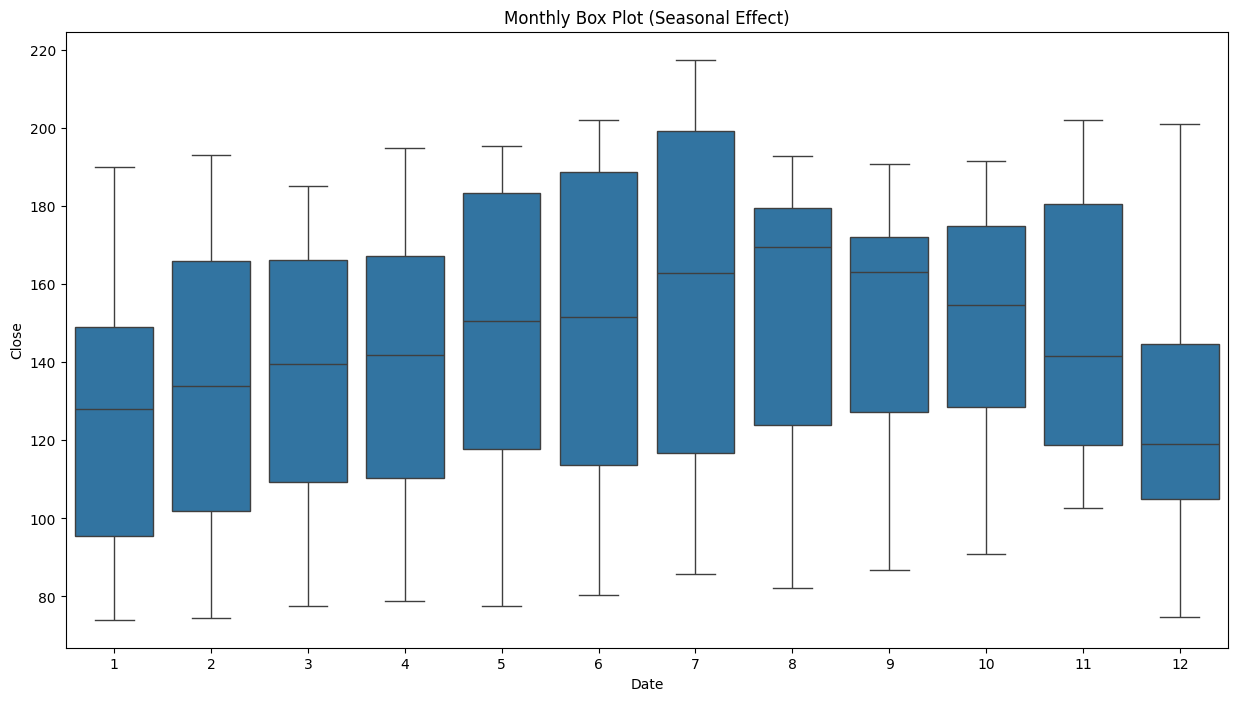

In [11]:
df['Year'] = df['Date'].dt.year

plt.figure(figsize=(15, 8))
sns.boxplot(x=df['Date'].dt.month, y='Close', data=df)
plt.title('Monthly Box Plot (Seasonal Effect)')
plt.show()

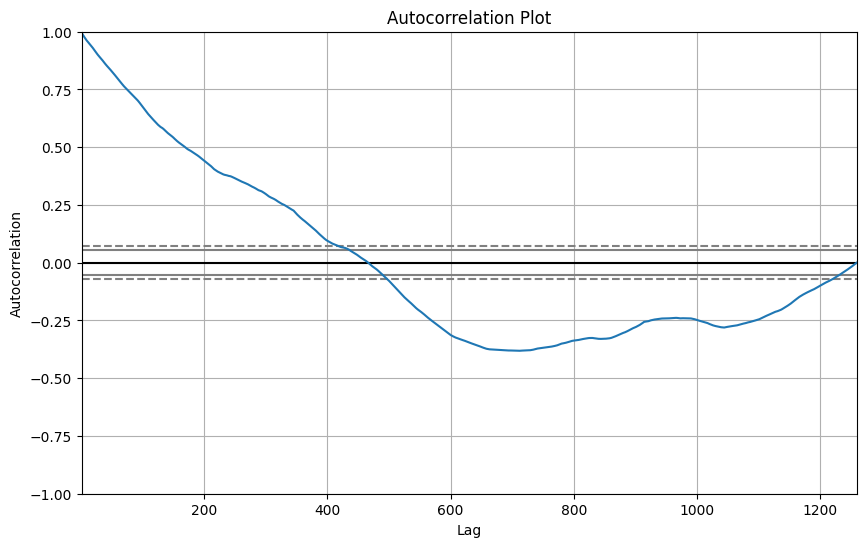

In [12]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(10, 6))
autocorrelation_plot(df['Close'])
plt.title('Autocorrelation Plot')
plt.show()

###The autocorrelation plot helps to identify the correlation between the time series and its lagged values.

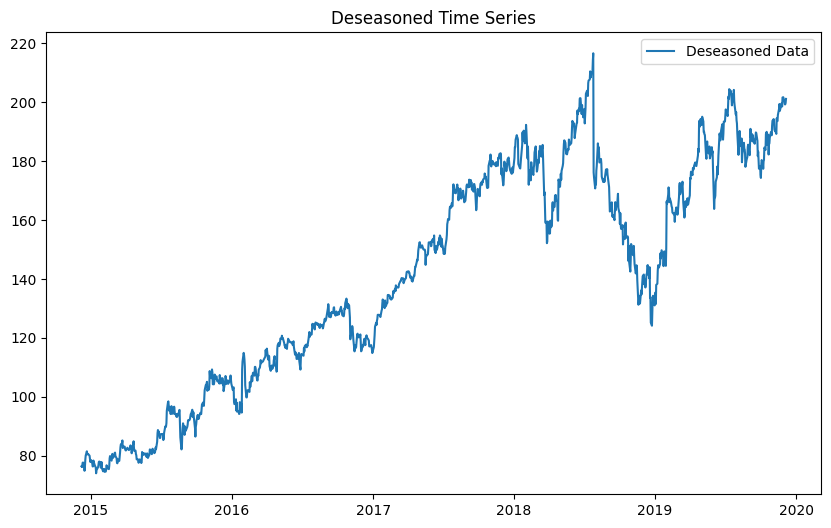

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Close'], model='multiplicative', period=12)
seasonal = result.seasonal

# Deseasoning
df['Deseasoned'] = df['Close'] / seasonal

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Deseasoned'], label='Deseasoned Data')
plt.title('Deseasoned Time Series')
plt.legend()
plt.show()

###Deseasoning involves removing the seasonal component from the data to analyze the trend and noise.

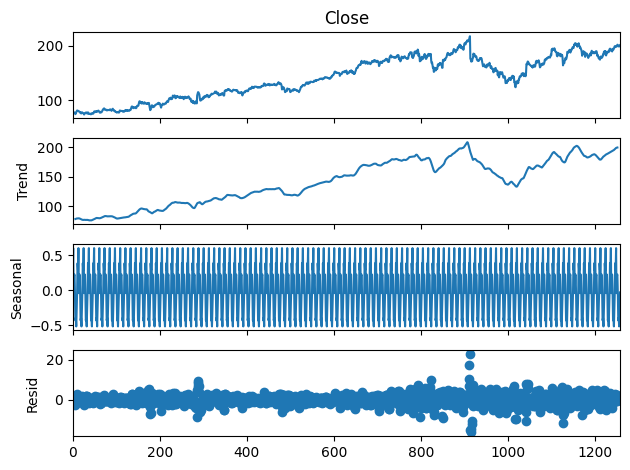

In [15]:
# Additive Decomposition
add = seasonal_decompose(df['Close'], model='additive', period=12)
add.plot()
plt.show()

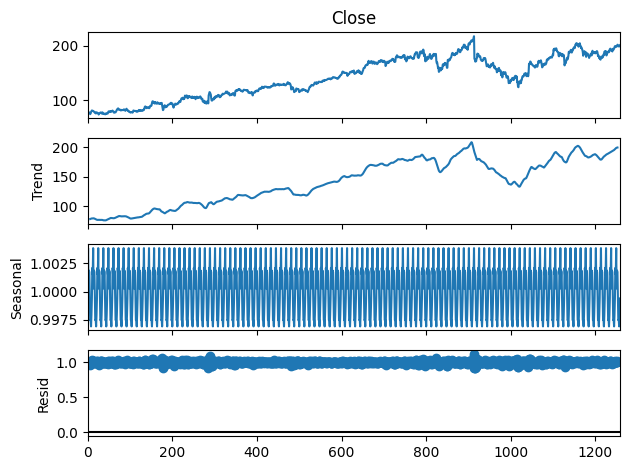

In [16]:
# Multiplicative Decomposition
mul = seasonal_decompose(df['Close'], model='multiplicative', period=12)
mul.plot()
plt.show()

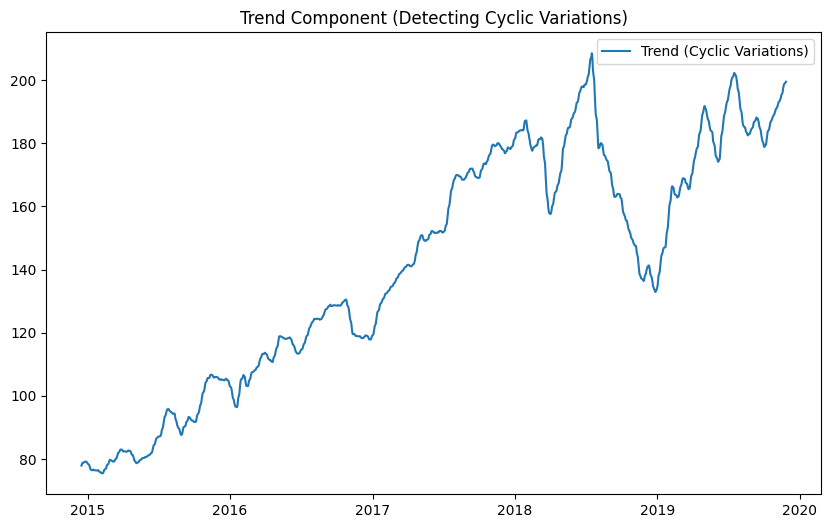

In [17]:
trend = mul.trend

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], trend, label='Trend (Cyclic Variations)')
plt.title('Trend Component (Detecting Cyclic Variations)')
plt.legend()
plt.show()

In [25]:
df1=pd.read_csv('/content/ice_cream_vs_heater.csv')

In [26]:
df1.head()

,Month,heater,ice cream
0,2004-01,27,13
1,2004-02,18,15
2,2004-03,14,16
3,2004-04,13,19
4,2004-05,13,21


In [27]:
df1.columns

Index(['Month', 'heater', 'ice cream'], dtype='object')

In [28]:
df1.isna().sum()

,0
Month,0
heater,0
ice cream,0


In [29]:
df1['Month'] = pd.to_datetime(df1['Month'], format='%Y-%m')

In [30]:
df1.head()

,Month,heater,ice cream
0,2004-01-01,27,13
1,2004-02-01,18,15
2,2004-03-01,14,16
3,2004-04-01,13,19
4,2004-05-01,13,21


In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Month      198 non-null    datetime64[ns]
 1   heater     198 non-null    int64         
 2   ice cream  198 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 KB


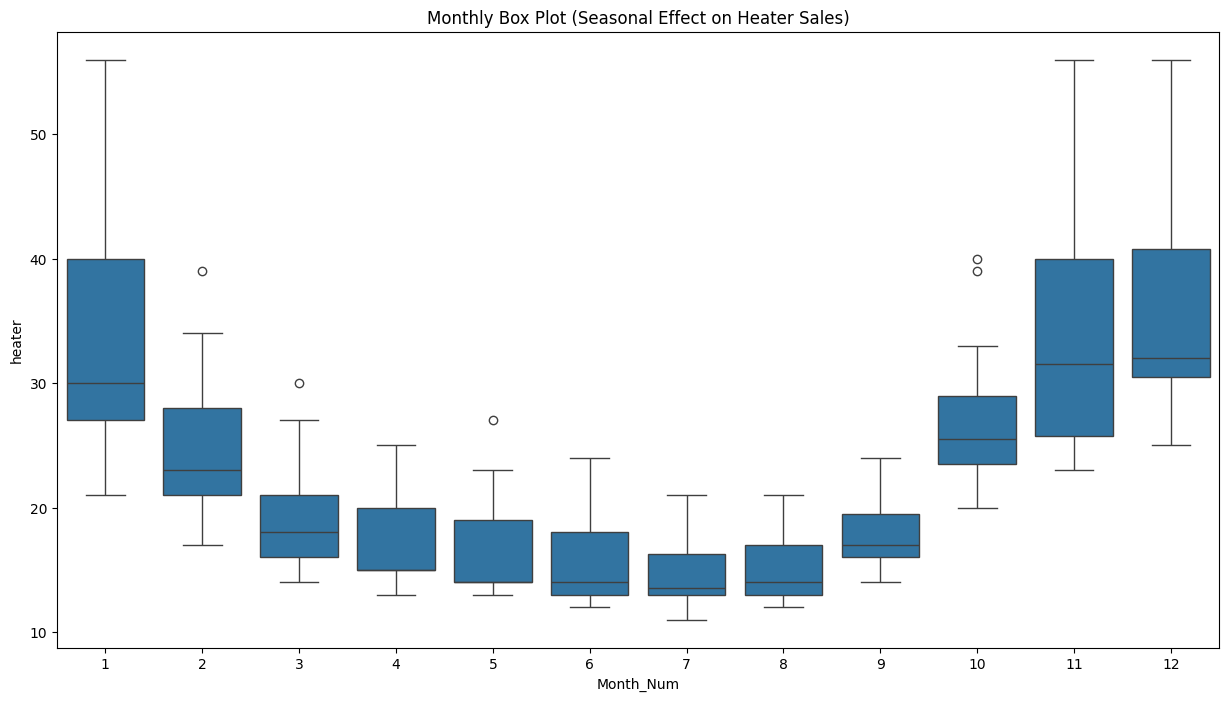

In [33]:
df1['Month_Num'] = df1['Month'].dt.month
df1['Year'] = df1['Month'].dt.year
plt.figure(figsize=(15, 8))
sns.boxplot(x='Month_Num', y='heater', data=df1)
plt.title('Monthly Box Plot (Seasonal Effect on Heater Sales)')
plt.show()

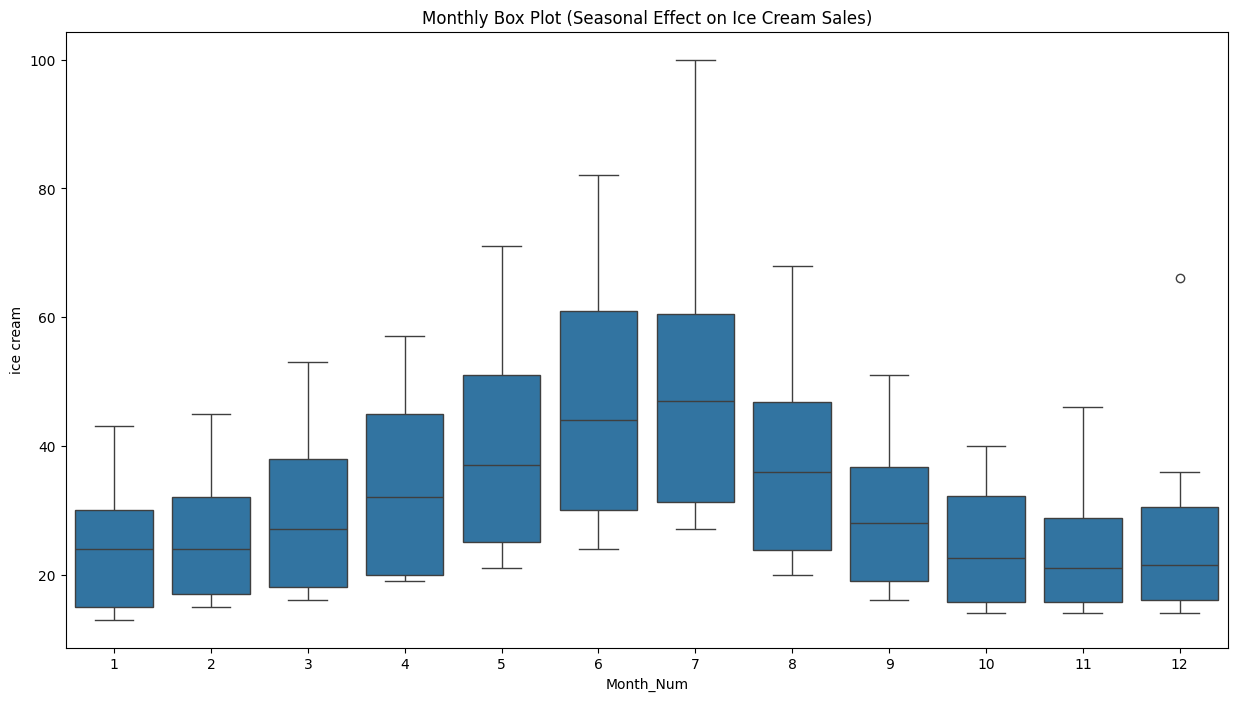

In [34]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Month_Num', y='ice cream', data=df1)
plt.title('Monthly Box Plot (Seasonal Effect on Ice Cream Sales)')
plt.show()

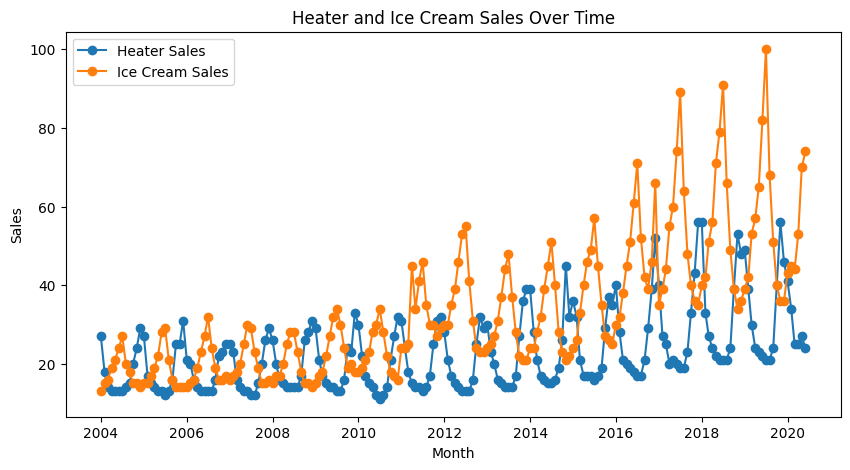

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df['Month'], df['heater'], label='Heater Sales', marker='o')
plt.plot(df['Month'], df['ice cream'], label='Ice Cream Sales', marker='o')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Heater and Ice Cream Sales Over Time')
plt.legend()
plt.show()

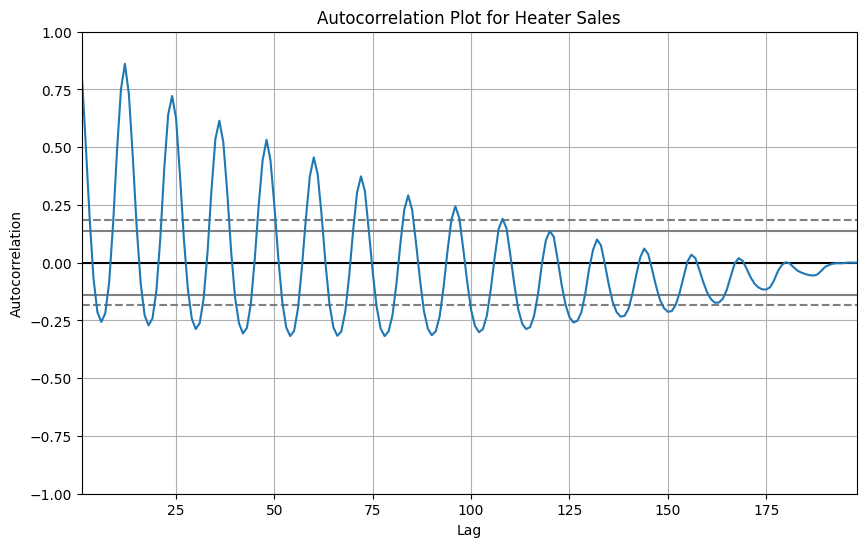

In [35]:
plt.figure(figsize=(10, 6))
autocorrelation_plot(df1['heater'])
plt.title('Autocorrelation Plot for Heater Sales')
plt.show()

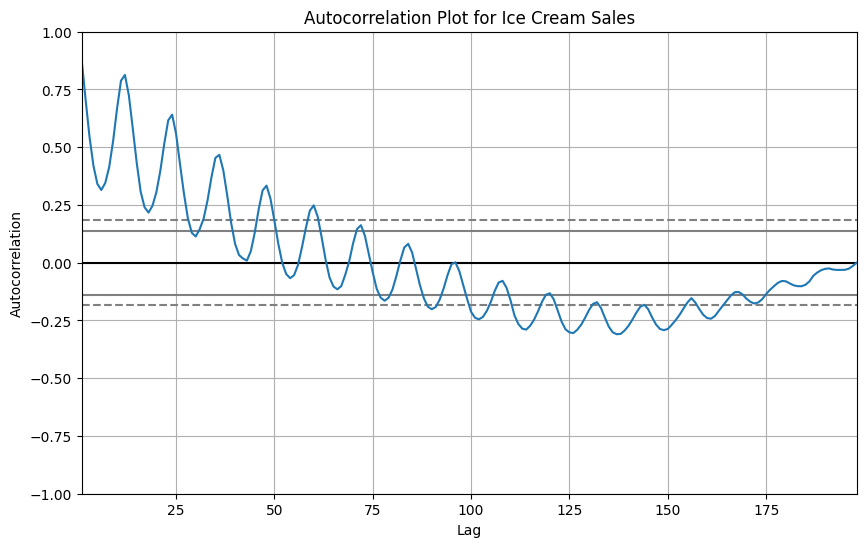

In [36]:
plt.figure(figsize=(10, 6))
autocorrelation_plot(df1['ice cream'])
plt.title('Autocorrelation Plot for Ice Cream Sales')
plt.show()

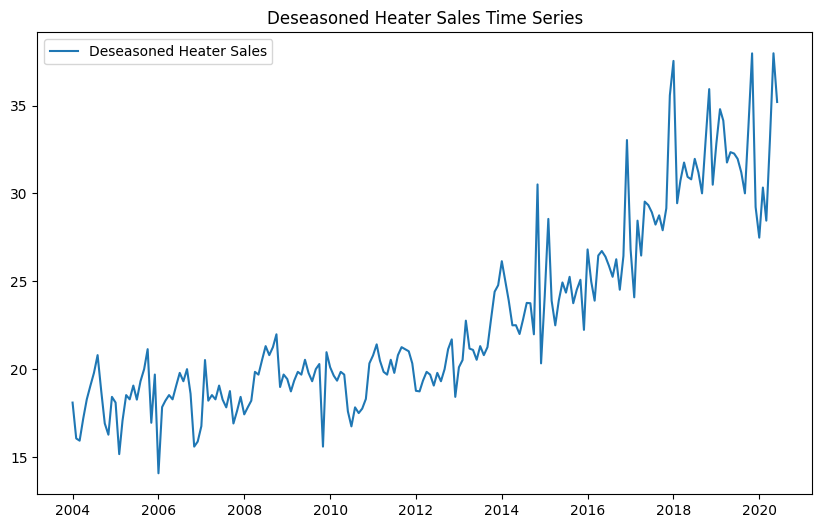

In [37]:
result_heater = seasonal_decompose(df1['heater'], model='multiplicative', period=12)
seasonal_heater = result_heater.seasonal
df1['Deseasoned_Heater'] = df1['heater'] / seasonal_heater
plt.figure(figsize=(10, 6))
plt.plot(df1['Month'], df1['Deseasoned_Heater'], label='Deseasoned Heater Sales')
plt.title('Deseasoned Heater Sales Time Series')
plt.legend()
plt.show()

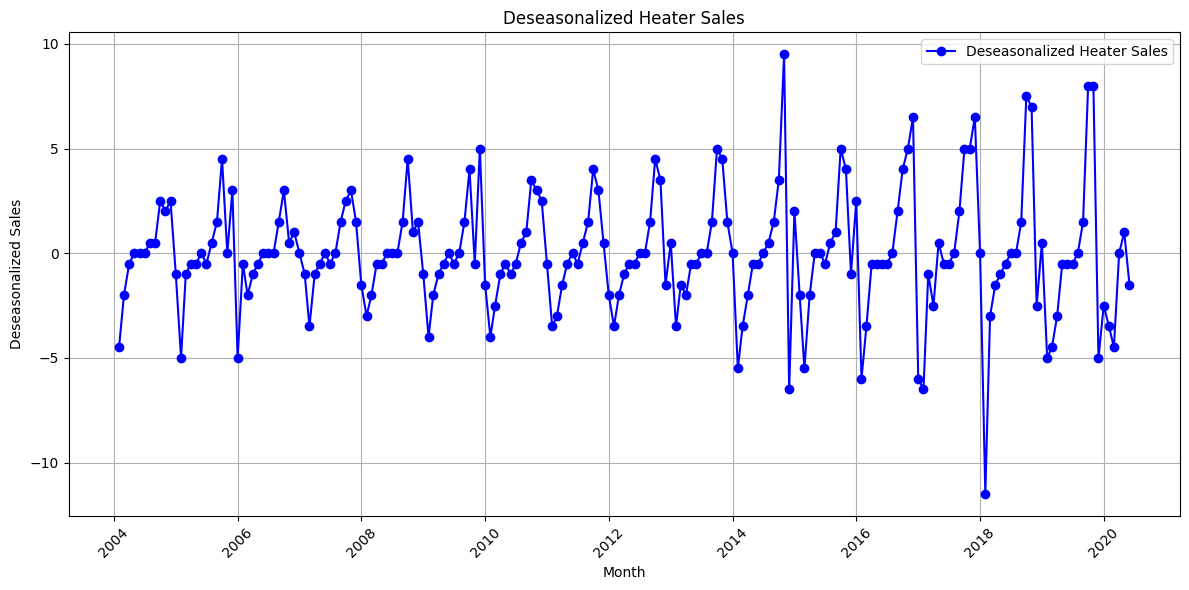

In [ ]:
df['Seasonal_Mean'] = df['heater'].rolling(window=2).mean()
df['Deseasonalized_Heater'] = df['heater'] - df['Seasonal_Mean']

plt.figure(figsize=(12,6))
plt.plot(df['Month'], df['Deseasonalized_Heater'], marker='o', linestyle='-', color='b', label='Deseasonalized Heater Sales')
plt.title('Deseasonalized Heater Sales')
plt.xlabel('Month')
plt.ylabel('Deseasonalized Sales')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

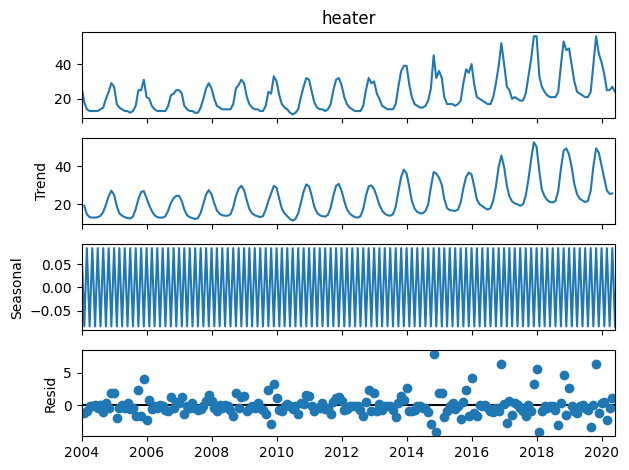

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
df.set_index('Month', inplace=True)
decomposition = seasonal_decompose(df['heater'], model='additive', period=2)
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()

In [40]:
result_ic = seasonal_decompose(df1['ice cream'], model='multiplicative', period=12)

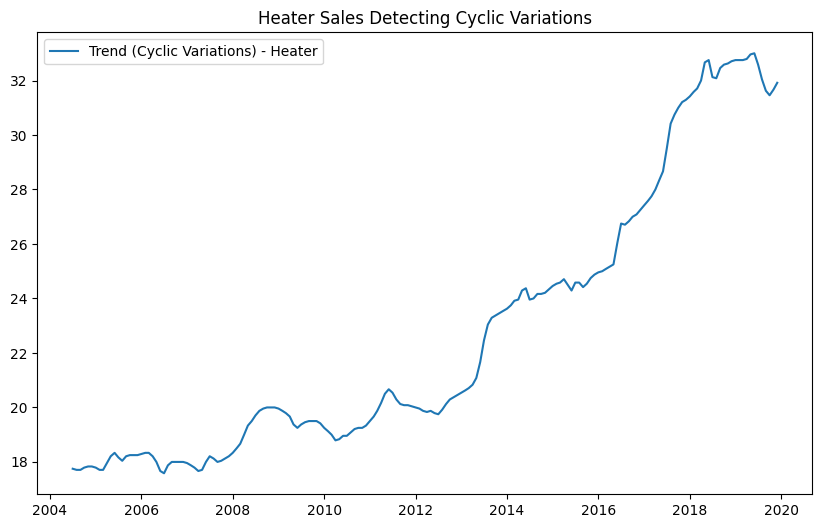

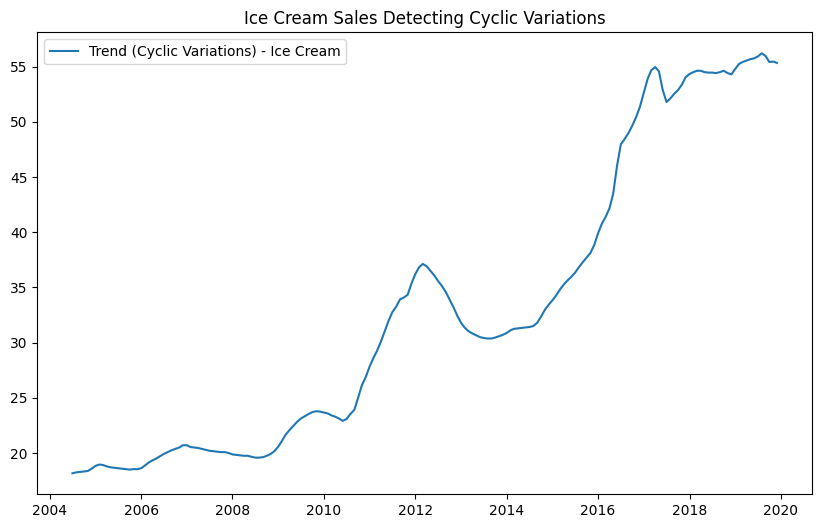

In [41]:
trend_heater = result_heater.trend

plt.figure(figsize=(10, 6))
plt.plot(df1['Month'], trend_heater, label='Trend (Cyclic Variations) - Heater')
plt.title('Heater Sales Detecting Cyclic Variations')
plt.legend()
plt.show()

trend_ice_cream = result_ic.trend

plt.figure(figsize=(10, 6))
plt.plot(df1['Month'], trend_ice_cream, label='Trend (Cyclic Variations) - Ice Cream')
plt.title('Ice Cream Sales Detecting Cyclic Variations')
plt.legend()
plt.show()

### Conclusion

The time series analysis on both datasets revealed distinct seasonal patterns, showing how stock prices, heater, and ice cream sales fluctuate monthly. Autocorrelation and decomposition confirmed these trends, while deseasoning helped to uncover the underlying patterns. Understanding these cyclic variations provides valuable insights for better forecasting and more informed strategic decisions.